In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import math
import time

In [3]:
os.chdir('C:/Users/2925582/OneDrive - Universitetet i Stavanger/PHD/PHD code/Data')

In [4]:
df0 = pd.read_excel('pt2.xlsx',header = 0)
df0 = df0.drop(df0.index[[0,1]])
df0.columns = ['t', 'p']
# to float
df0['t'] = df0['t'].astype(float)
df0['p'] = df0['p'].astype(float)
df0.head()

,t,p
2,0.0000,5000.000000
3,0.0006,4998.754460
4,0.0012,4997.515954
5,0.0018,4996.283665
6,0.0024,4995.057229


In [5]:
deltat = 300

end = 400
p0 = df0['p'][df0['t']==deltat].values

df1 = df0[(df0['t']>=deltat) & (df0['t']<=end)]
# reset index
df1 = df1.reset_index(drop=True)
df1.head()

,t,p
0,300.0000,4666.153405
1,300.0006,4666.776105
2,300.0012,4667.395286
3,300.0018,4668.011360
4,300.0024,4668.624507


In [6]:
qn = 250
bui2 = -(0-250)/qn*np.log10(df1.t.values[1:]-300)
pro2 = -(250-0)/qn*np.log10(df1.t.values[1:] - 200)
bui1 = -(0-500)/qn*np.log10(df1.t.values[1:]-100)
pro1 = -(500-0)/qn*np.log10(df1.t.values[1:] - 0)
t_s = pro2 + bui2 + pro1 + bui1

In [7]:
df22 = pd.read_excel('super2.xlsx',header = 0)
df22 = df22.drop(df22.index[[0,1]]) 
df22.columns = ['t', 'p']
df22.head(1)

,t,p
2,-5.574033,4666.776105


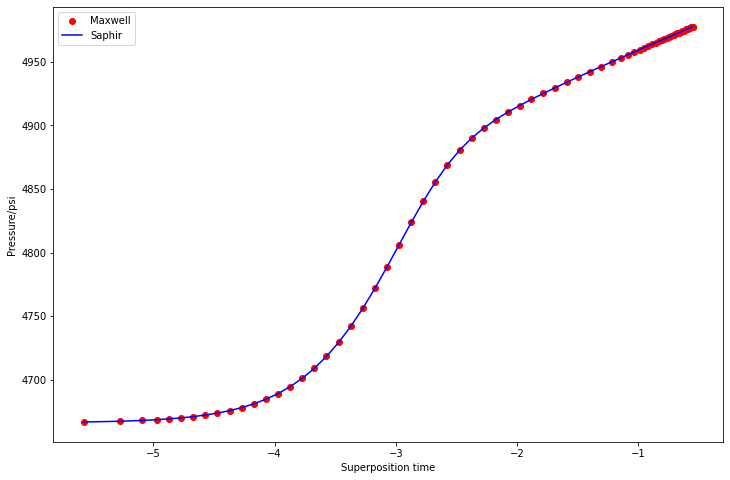

In [8]:
# set the figure size
plt.figure(figsize=(12, 8))
plt.scatter(t_s,df1.p.values[1:], color = 'red', #legend = 'Maxwell'
           label = 'Maxwell')
plt.plot(df22.t.values,df22.p.values, color = 'blue', #legend = 'Saphir'
           label = 'Saphir')
# x label
plt.xlabel('Superposition time')
# y label
plt.ylabel('Pressure/psi')
plt.legend() 

In [9]:
p = df1.p.values[1:]

In [10]:
t0 = t_s[0:-2]
t1 = t_s[1:-1]
t2 = t_s[2:]
p0 = p[0:-2]
p1 = p[1:-1]
p2 = p[2:]


In [11]:
x1 = t1-t0
x2 = t2-t1
pp1 = p1-p0
pp2 = p2-p1
der = (pp1/x1*x2 + pp2/x2*x1)/(x1+x2)
der = der/np.log(10)
# remove the last der
der = der[0:-1]

In [12]:
ttt = df1.t.values[1:]-deltat
ttt_der = ttt[1:-2] # note the shape of der should be the same as ttt_der
ppp = df1.p.values-df1.p.values[0]
ppp = ppp[1:]

In [13]:
df5 = pd.read_excel('derx2.xlsx',header = 0)
# delete row 0 and 1
df5 = df5.drop(df5.index[[0,1]])
df5.columns = ['t', 'p','t1','dp']
df5.head()

,t,p,t1,dp
2,0.0006,0.622699,0.0006,0.498243
3,0.0012,1.241881,0.0012,1.288349
4,0.0018,1.857955,0.0018,1.877394
5,0.0024,2.471102,0.0024,2.472285
6,0.003021,3.103185,0.003021,3.0916


Text(0.5, 1.0, 'loglog plot of pressure and derivative')

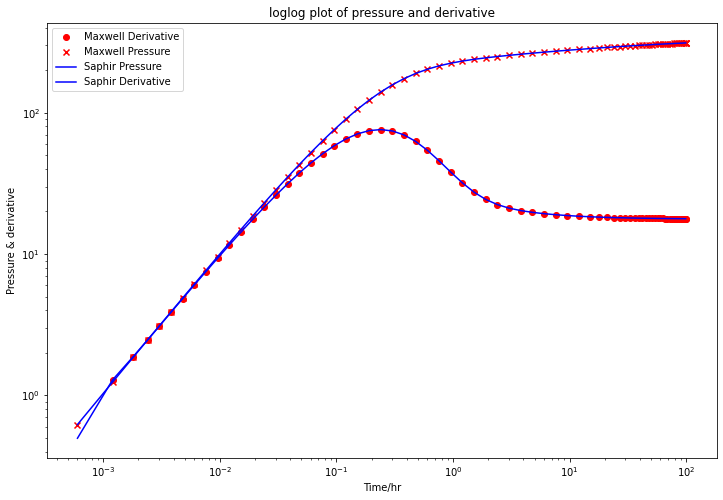

In [14]:
# set the figure size
plt.figure(figsize=(12, 8))
# plot the derivative
plt.scatter(ttt_der,der,color = 'red',label = 'Maxwell Derivative')
# plot the pressure
plt.scatter(ttt,ppp,color = 'red',marker = 'x',label = 'Maxwell Pressure')

plt.plot(df5.t.values,df5.p.values,color = 'blue',label = 'Saphir Pressure')
plt.plot(df5.t1.values,df5.dp.values,color = 'blue',label = 'Saphir Derivative')
#log xscale
plt.xscale('log')
plt.yscale('log')
# x label
plt.xlabel('Time/hr')
# y label
plt.ylabel('Pressure & derivative')
plt.legend()
# title
plt.title('loglog plot of pressure and derivative')


In [131]:
# calculate which value has log() = 0.1
# the value is 2.3025850929940455
np.log10(0.1)

-1.0

In [54]:
L= 0.1
# if x1 > L, then x1 = L, else x1 = t1-t0
x1s = np.where(x1>L,L,x1)
x2s = np.where(x2>L,L,x2)

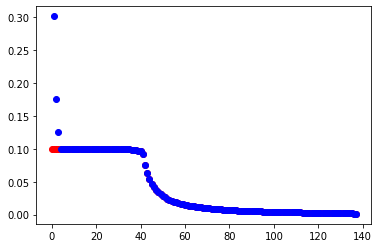

In [53]:
plt.scatter(np.arange(0,len(x1s)),x1s,color ='r',label = 'x1s')
plt.scatter(np.arange(0,len(x1)),x1,color = 'b',label = 'x1')

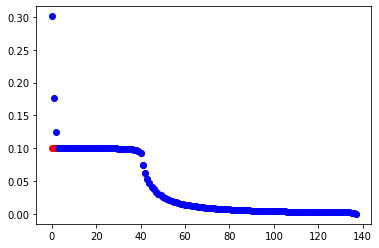

In [55]:
plt.scatter(np.arange(0,len(x2s)),x2s,color ='r',label = 'x2s')
plt.scatter(np.arange(0,len(x2)),x2,color = 'b',label = 'x2')

In [58]:
np.log(0.1)

-2.3025850929940455

In [60]:
x1

array([       inf, 0.30102913, 0.17609039, 0.12493787, 0.10003441,
       0.0999167 , 0.10001856, 0.10001109, 0.09999457, 0.09999588,
       0.10000906, 0.10001152, 0.09999067, 0.09998627, 0.09999038,
       0.09999002, 0.09998839, 0.09997671, 0.09998131, 0.09997015,
       0.09996392, 0.09995538, 0.09994348, 0.0999277 , 0.0999107 ,
       0.09988607, 0.0998582 , 0.09982031, 0.09977473, 0.09971645,
       0.09964295, 0.0995512 , 0.09943559, 0.09929057, 0.09910843,
       0.09888019, 0.09859436, 0.09823689, 0.09779047, 0.09723424,
       0.09654294, 0.09254863, 0.0749278 , 0.06277117, 0.05387876,
       0.04709291, 0.04174586, 0.03742526, 0.03386263, 0.03087559,
       0.02833595, 0.02615092, 0.02425171, 0.02258621, 0.02111426,
       0.01980438, 0.01863155, 0.01757564, 0.01662028, 0.015752  ,
       0.01495963, 0.01423383, 0.01356673, 0.01295162, 0.01238282,
       0.0118554 , 0.01136512, 0.0109083 , 0.01048173, 0.01008258,
       0.00970838, 0.00935692, 0.00902627, 0.00871469, 0.00842

(array([36., 22., 10.,  7.,  4.,  3.,  2.,  2.,  1.,  2.,  1.,  0.,  1.,
         1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  1.,  1., 36.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.00107943, 0.00407893, 0.00707843, 0.01007792, 0.01307742,
        0.01607692, 0.01907641, 0.02207591, 0.02507541, 0.0280749 ,
        0.0310744 , 0.0340739 , 0.0370734 , 0.04007289, 0.04307239,
        0.04607189, 0.04907138, 0.05207088, 0.05507038, 0.05806987,
        0.06106937, 0.06406887, 0.06706836, 0.07006786, 0.07306736,
        0.07606686, 0.07906635, 0.08206585, 0.08506535, 0.08806484,
        0.09106434, 0.0940

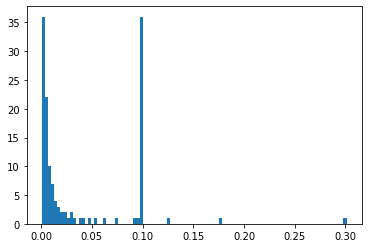

In [132]:
# histogram of x1
plt.hist(x1,bins = 100)

In [56]:
L = 0.1

x1s = np.where(x1>L,np.log(L),x1)
x2s = np.where(x2>L,np.log(L),x2)
pp1 = p1-p0
pp2 = p2-p1
der = (pp1/x1s*x2s + pp2/x2s*x1s)/(x1s+x2s)
der = der/np.log(10)

Text(0.5, 1.0, 'Pressure and derivative with smoothing')

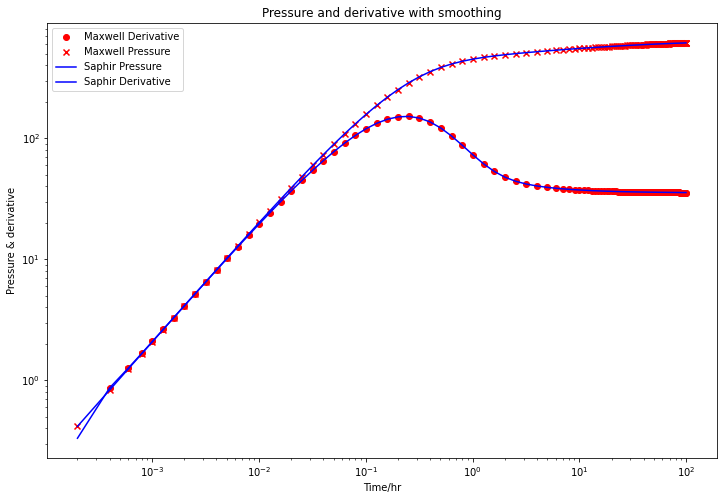

In [133]:
# set the figure size
plt.figure(figsize=(12, 8))
# plot the derivative
plt.scatter(ttt_der,der,color = 'red',label = 'Maxwell Derivative')
# plot the pressure
plt.scatter(ttt,ppp,color = 'red',marker = 'x',label = 'Maxwell Pressure')

plt.plot(df5.t.values,df5.p.values,color = 'blue',label = 'Saphir Pressure')
plt.plot(df5.t1.values,df5.dp.values,color = 'blue',label = 'Saphir Derivative')
#log xscale
plt.xscale('log')
plt.yscale('log')
# x label
plt.xlabel('Time/hr')
# y label
plt.ylabel('Pressure & derivative')
plt.legend()
# title
plt.title('Pressure and derivative with smoothing')

In [52]:
t0 = df5['t'].iloc[0:-2].values
t1 = df5['t'].iloc[1:-1].values
t2 = df5['t'].iloc[2:].values
p0 = df5['p'].iloc[0:-2].values
p1 = df5['p'].iloc[1:-1].values
p2 = df5['p'].iloc[2:].values

L = 0.1

der_list = []

for i in range(len(t0)):
    w1 = np.log(t1[i])-np.log(t0[i]) 
    w2 = np.log(t2[i])-np.log(t1[i])

    if (w1>L) & (w2>L):
        w1 = L
        w2 = L
        w3 = w1+w2
        der = (p1[i]-p0[i])/w1*w2/w3 + (p2[i]-p1[i])/w2*w1/w3 
    elif (w1>L) & (w2<L):
        w2 = np.abs(np.log(L))
        w3 = w1+w2
        der = (p1[i]-p0[i])/w1*w2/w3 + (p2[i]-p1[i])/w2*w1/w3 
    elif (w1<L) & (w2>L):
        w1 = np.abs(np.log(L))
        w3 = w1+w2
        der = (p1[i]-p0[i])/w1*w2/w3 + (p2[i]-p1[i])/w2*w1/w3 
    else:
        w1 = np.abs(np.log(L))
        w2 = np.abs(np.log(L))
        w3 = w1+w2
        der = (p1[i]-p0[i])/w1*w2/w3 + (p2[i]-p1[i])/w2*w1/w3 
    der_list.append(der)

    

# change der_list to array
der_list = np.array(der_list)